In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount('/content/drive')

Mounted at /content/gdrive
Mounted at /content/drive


# pythonProjectFlask is Anisha's personal  folder with latest changes as she is making changes here.

In [2]:
%cd '/content/drive/Shareddrives/Data 298A/'
!zip -r '/content/pythonProjectFlask.zip' pythonProjectFlask


/content/drive/Shareddrives/Data 298A
  adding: pythonProjectFlask/ (stored 0%)
  adding: pythonProjectFlask/EnsembleModel.py (deflated 68%)
  adding: pythonProjectFlask/static/ (stored 0%)
  adding: pythonProjectFlask/static/images/ (stored 0%)
  adding: pythonProjectFlask/static/images/airbnb_logo.jpeg (deflated 10%)
  adding: pythonProjectFlask/static/images/about1.jpeg (deflated 0%)
  adding: pythonProjectFlask/static/images/about2.jpeg (deflated 1%)
  adding: pythonProjectFlask/static/images/hero-background.jpeg (deflated 2%)
  adding: pythonProjectFlask/static/images/about.jpeg (deflated 0%)
  adding: pythonProjectFlask/static/about_style.css (deflated 57%)
  adding: pythonProjectFlask/static/style.css (deflated 57%)
  adding: pythonProjectFlask/static/.DS_Store (deflated 93%)
  adding: pythonProjectFlask/jsons/ (stored 0%)
  adding: pythonProjectFlask/jsons/validation_labels.json (deflated 89%)
  adding: pythonProjectFlask/jsons/train_labels.json (deflated 88%)
  adding: pythonP

In [3]:
%cd '/content/'
!unzip pythonProjectFlask.zip

/content
Archive:  pythonProjectFlask.zip
   creating: pythonProjectFlask/
  inflating: pythonProjectFlask/EnsembleModel.py  
   creating: pythonProjectFlask/static/
   creating: pythonProjectFlask/static/images/
  inflating: pythonProjectFlask/static/images/airbnb_logo.jpeg  
  inflating: pythonProjectFlask/static/images/about1.jpeg  
  inflating: pythonProjectFlask/static/images/about2.jpeg  
  inflating: pythonProjectFlask/static/images/hero-background.jpeg  
  inflating: pythonProjectFlask/static/images/about.jpeg  
  inflating: pythonProjectFlask/static/about_style.css  
  inflating: pythonProjectFlask/static/style.css  
  inflating: pythonProjectFlask/static/.DS_Store  
   creating: pythonProjectFlask/jsons/
  inflating: pythonProjectFlask/jsons/validation_labels.json  
  inflating: pythonProjectFlask/jsons/train_labels.json  
   creating: pythonProjectFlask/templates/
  inflating: pythonProjectFlask/templates/register.html  
  inflating: pythonProjectFlask/templates/about.html  

In [4]:
%cd '/content/pythonProjectFlask'
!python -m pip install pyyaml==5.1
!pip install transformers
!pip install pyngrok
!pip install flask-ngrok
!pip install pymysql
!ngrok authtoken '2WRXZOJUBB3IOX0RrUjGVR6wJsg_5YWsmq34UaANWPymTFHJn'
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


/content/pythonProjectFlask
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 40.2 MB/s eta 0:00:00
  

In [5]:
import torch, detectron2
!nvcc --version
import pymysql
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


# Flask

Registering airbnb-openImagesV7/train
Registering airbnb-openImagesV7/validation
[11/11 09:46:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[11/11 09:46:40 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), 

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://6d93-34-125-63-249.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:51] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:52] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:52] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:52] "GET /static/images/hero-background.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:52] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:52] "GET /host_view HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:53] "GET /static/about_style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:53] "GET /static/images/about2.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:53] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:53] "GET /static/images/about.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:53] "GET /st

Register Page - GET
Register Page - Post
airbnb_id 1


INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:58] "POST /register_airbnb HTTP/1.1" 200 -


Row with airbnb_id 1 already exists.


INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:58] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:46:58] "GET /static/about_style.css HTTP/1.1" 304 -


[11/11 09:47:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[11/11 09:47:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
    

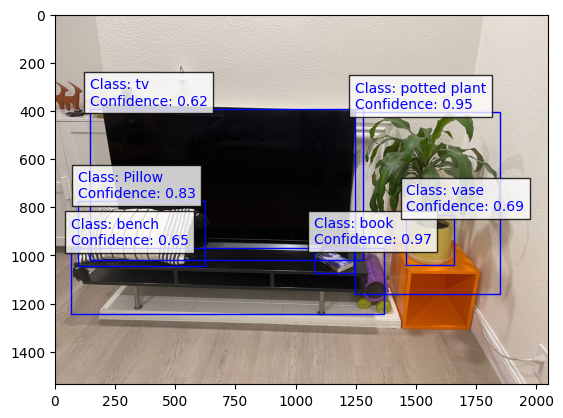

book=1, potted plant=1, vase=1, bench=1, tv=1, Pillow=1
[11/11 09:47:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[11/11 09:47:15 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_

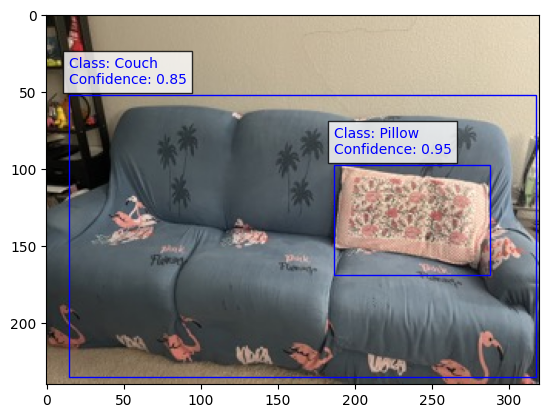

INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:47:22] "POST /airbnb_detections HTTP/1.1" 200 -


Pillow=1, Couch=1


INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:47:22] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2023 09:47:22] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 304 -


<Figure size 640x480 with 0 Axes>

In [9]:
from flask import Flask, render_template, request, redirect, url_for,session
from flask_ngrok import run_with_ngrok
import Utility
import EnsembleModel
import base64
import io
import numpy as np
app = Flask(__name__)
app.secret_key = '1'
run_with_ngrok(app)

airbnb_openV7_metadata = Utility.register()
mask_cfg,mask_predictor = EnsembleModel.load_pretrained_maskRCNN_Model()
faster_predictor = EnsembleModel.fasterrcnn_model()
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/about')
def about():
    return render_template('about.html')

@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'POST':
        # Handle registration logic here (e.g., store user data in a database)
        return redirect(url_for('login'))
    return render_template('register.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        # Handle login logic here (e.g., check credentials)
        return 'Logged in successfully'  # Replace with your login logic
    return render_template('login.html')

@app.route('/host_view')
def host_view():
    return render_template('host_view.html')

@app.route('/guest_view')
def guest_view():
    return render_template('guest_view.html')

@app.route('/register_airbnb', methods=['GET', 'POST'])
def register_airbnb():
    if request.method == 'GET':
        print('Register Page - GET')
    if request.method == 'POST':
            print('Register Page - Post')
            airbnb_id = int(request.form['id'])
            print('airbnb_id',airbnb_id)
            session['airbnb_id'] = airbnb_id
            airbnb_name = request.form['name']
            airbnb_location = request.form['location']
            airbnb_price = float(request.form['price'])
            if Utility.insert_into_airbnb_registration(airbnb_id, airbnb_name, airbnb_location, airbnb_price):
              print('Inserted into airbnb_registration')
            return render_template('airbnb_detections.html')
            # print(uploaded_image)
            # image,detected_labels_str = RetinaNetClass.upload_image(uploaded_image,predictor,airbnb_openV7_metadata,airbnb_id)
            # Convert the PIL image to a byte stream
            # image_byte_array = io.BytesIO()
            # image.save(image_byte_array, format='JPEG')
            # Encode the byte stream as base64
            # base64_image = base64.b64encode(image_byte_array.getvalue()).decode('utf-8')
    # else:
        # If no image was uploaded, set base64_image to None
        # base64_image = None

    return render_template('register_airbnb.html')


@app.route('/airbnb_detections', methods=['GET', 'POST'])
def airbnb_detections():
    if request.method == 'POST':
        # Check if the 'amenity' field is filled out
        selected_amenity = request.form.get('amenity')
        airbnb_id = session.get('airbnb_id')

        if selected_amenity:
            # Check if images were uploaded
            if 'image' in request.files:
                uploaded_images = request.files.getlist('image')
                detected_images = []  # Store detected images and labels for each image

                for uploaded_image in uploaded_images:
                    if uploaded_image:
                        # Save the uploaded image temporarily
                        temp_image_path = 'temp_image.jpg'
                        uploaded_image.save(temp_image_path)

                        # Process each uploaded image here
                        image, detected_labels_str = EnsembleModel.process_uploaded_image(temp_image_path, airbnb_openV7_metadata, airbnb_id, selected_amenity)

                        # Convert the PIL image to a byte stream
                        image_byte_array = io.BytesIO()
                        image.save(image_byte_array, format='JPEG')
                        base64_image = base64.b64encode(image_byte_array.getvalue()).decode('utf-8')

                        detected_images.append((base64_image, detected_labels_str))

                return render_template('airbnb_detections.html', detected_images=detected_images)

    return render_template('airbnb_detections.html')



if __name__ == '__main__':
    app.run()



In [7]:
# import json
# import matplotlib.pyplot as plt

# # Lists to store loss values and iterations
# iterations = []
# loss_box_reg_values = []
# loss_cls_values = []

# # Assuming the data is in a text file named "data.txt"
# with open("metrics (1).json", "r") as file:
#     for line in file:
#         # Parse each line as JSON
#         data = json.loads(line)

#         # Extract relevant data
#         iteration = data["iteration"]
#         loss_box_reg = data["loss_box_reg"]
#         loss_cls = data["loss_cls"]

#         # Append data to lists
#         iterations.append(iteration)
#         loss_box_reg_values.append(loss_box_reg)
#         loss_cls_values.append(loss_cls)

# # Close the file when done
# file.close()

# # Create a loss graph
# plt.figure(figsize=(5, 5))
# # plt.plot(iterations, loss_box_reg_values, label="Loss Box Reg")
# plt.plot(iterations, loss_cls_values, label="Loss CLS")
# plt.xlabel("Iteration")
# plt.ylabel("Loss")
# plt.title("Loss Graph")
# plt.legend()
# plt.grid(True)

# # Show the graph
# plt.show()
